In [1]:
import numpy as np
import matplotlib.pyplot as plt
from synthesizer.abundances import (
    Abundances,
    Elements,
    abundance_scalings,
    reference_abundance_patterns,
    depletion_models,
    plot_abundance_pattern,
    plot_multiple_abundance_patterns,
)


In [2]:
# set style
plt.style.use('../../matplotlibrc.txt')

In [3]:
reference_abundance_patterns.available_patterns

['Asplund2009', 'GalacticConcordance', 'Gutkin2016']

## Solar abundance pattern

/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_44001/3609192972.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


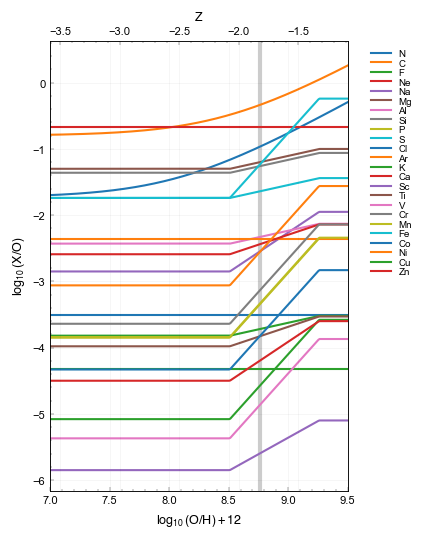

In [17]:

fig = plt.figure(figsize=(3.5, 6.0))

left = 0.1
height = 0.75
bottom = 0.2
width = 0.85

ax = fig.add_axes((left, bottom, width, height))
ax2 = ax.twiny()

# the reference oxygen abundance for GalacticConcordance, i.e. [O/H]
reference_oxygen_abundance = -3.24
reference_metallicity = 0.015

oxygen_to_hydrogen_range = np.array([7., 9.5])
metallicity_range = np.log10(reference_metallicity) + oxygen_to_hydrogen_range - reference_oxygen_abundance - 12.

ax.axvline(reference_oxygen_abundance+12., lw=3, c='k', alpha=0.2)


scaling_study_name = 'GalacticConcordance'

# create an array of metallicities equally space in log-space
log10metallicities = np.arange(-4., -1.0, 0.01)
metallicities = 10**log10metallicities



# (O/H), assumed to scale linearly with metallicity
oxygen_abundance = (reference_oxygen_abundance + np.log10(metallicities/reference_metallicity))

scaling_study = getattr(abundance_scalings, scaling_study_name)()

for element in scaling_study.available_elements:

    scaling = getattr(scaling_study, element)

    abundances = np.array([
        scaling(metallicity) for metallicity in metallicities
    ])

    # log10(N/O) = log10(N/H) - log10(O/H)
    x_to_oxygen_ratios = abundances - oxygen_abundance

    ax.plot(oxygen_abundance + 12., x_to_oxygen_ratios, label=element)

ax.set_xlim(oxygen_to_hydrogen_range)
ax2.set_xlim(metallicity_range)
# ax.set_ylim([])

ax.set_ylabel(rf'$\log_{{10}}(X/O)$')
ax.set_xlabel(r'$\log_{10}(O/H)+12$')
ax2.set_xlabel(r'$Z$')
ax.legend(bbox_to_anchor=(1.05, 1.0), fontsize=7, labelspacing=0.05)
fig.show()




In [5]:
def create_solar_relative_abundance_pattern_figure(
        solar_pattern,
        patterns,
        fig_name,
        labels=None):

    fig = plt.figure(figsize=(3.5, 6.0))

    left = 0.1
    height = 0.75
    bottom = 0.2
    width = 0.85

    ax = fig.add_axes((left, bottom, width, height))

    ax.axvline(0.0, lw=3, c='k', alpha=0.2)

    markers = ['o', '^', 'p', 'h']

    for a, marker in zip(patterns, markers):
        
        for i, element in enumerate(Elements.metals):

            x = a[element] - solar_pattern[element]

            ax.scatter(x, i, marker=marker, s=10, c='k', alpha=0.5)

    # add label

    ax.set_xlim([-1., 0.4])
    ax.set_ylim([len(Elements.metals)-0.5, -0.5])

    ax.legend(bbox_to_anchor=(1.0, -0.1), fontsize=8, labelspacing=0.2, ncol=2)
    ax.set_yticks(
        range(len(Elements.metals)), Elements.metals, fontsize=6.0
    )
    ax.set_xlabel(r'$[X/H]$')

    fig.savefig(f'figs/{fig_name}.pdf')
    plt.show()